In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv('diabetic_data.csv', dtype = object)

In [3]:
dataset.shape

(101766, 50)

In [4]:
dataset.columns

Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age', u'weight',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'payer_code',
       u'medical_specialty', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'diag_1', u'diag_2', u'diag_3',
       u'number_diagnoses', u'max_glu_serum', u'A1Cresult', u'metformin',
       u'repaglinide', u'nateglinide', u'chlorpropamide', u'glimepiride',
       u'acetohexamide', u'glipizide', u'glyburide', u'tolbutamide',
       u'pioglitazone', u'rosiglitazone', u'acarbose', u'miglitol',
       u'troglitazone', u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide-metformin', u'glipizide-metformin',
       u'glimepiride-pioglitazone', u'metformin-rosiglitazone',
       u'metformin-pioglitazone', u'change', u'diabetesMed', u'readmitted'],
      dtype='object')

In [5]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
for i in dataset.columns:
    dataset[i][dataset[i] == '?'] = np.nan

In [8]:
dataset['race'].fillna('Unknown', inplace = True)

In [9]:
dataset['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [10]:
dataset['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [11]:
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Diabetes: 250.XX
Circulatory: 390 - 459 and 785
Respiratory: 460 - 519, and 786
Digestive: 520-579 and 787
Injury: 800 - 999
Muskuloskeletal: 710 - 739
Genitourinary: 580 - 629 and 788
Neoplasms: 140 - 239, 780, 781, 784, 790 - 799, 240-249, 251 - 271, 680 - 709, 782, 001- 139
Other: 290 - 319, E - V, 280 - 289, 320 - 359, 630 - 679, 360 - 389, 740 - 759

In [14]:
import math
def getencoding(value):
    '''
    0: Diabetese
    1: Circulatory
    2: Respiratory
    3: Digestive
    4: Injury
    5: Muskuloskeletal
    6: Genitourinary
    7: Neoplasms
    8: Others
    '''
    #result = 8
    if (str.isalpha(str(value)[0])):
        return 8
    else:
        if math.floor(float(value)) == 250:
            return 0
        if ((float(value)) >= 390 and float(value) <= 459) or float(value) == 785:
            return 1
        if (float(value) >= 460 and float(value) <= 519) or float(value) == 786:
            return 2
        if (float(value) >= 520 and float(value) <= 579) or float(value) == 787:
            return 3
        if (float(value) >= 800 and float(value) <= 999):
            return 4
        if (float(value) >= 710 and float(value) <= 739):
            return 5
        if (float(value) >= 580 and float(value) <= 629) or float(value) == 788:
            return 6
        if (float(value) >= 140 and float(value) <= 239) or (float(value) >= 790 and float(value) <= 799) \
        or (float(value) >= 240 and float(value) <= 249) or (float(value) >= 251 and float(value) <= 271) \
        or (float(value) >= 680 and float(value) <= 709) or (float(value) >= 1 and float(value) <= 139) \
        or (float(value) >= 780 and float(value) <= 782):
            return 7
        if (float(value) >= 290 and float(value) <= 319) or (float(value) >= 280 and float(value) <= 289)\
        or (float(value) >= 320 and float(value) <= 389) or (float(value) >= 630 and float(value) <= 679) \
        or (float(value) >= 740 and float(value) <= 759):
            return 8
        else:
            return 8        

In [15]:
#from str import isalpha
#from math import floor
dataset['diag_1_new'] = dataset['diag_1'].apply(getencoding)
dataset['diag_2_new'] = dataset['diag_2'].apply(getencoding)
dataset['diag_3_new'] = dataset['diag_3'].apply(getencoding)

In [ ]:
dataset.head()

In [16]:
dataset.dropna(axis = 1, inplace = True)

In [17]:
#dataset['patient_nbr'].value_counts()
#dataset.drop('encounter_id', axis = 1, inplace = True)
#dataset.drop('patient_nbr', axis = 1, inplace = True)

In [ ]:
dataset.head()

In [ ]:
dataset.info()

In [18]:
types = {u'race': str, u'gender': str, u'age':str, u'admission_type_id': np.int32,
       u'discharge_disposition_id': np.int32, u'admission_source_id': np.int32,
       u'time_in_hospital': np.int32, u'num_lab_procedures': np.int32, u'num_procedures': np.int32,
       u'num_medications': np.int32, u'number_outpatient': np.int32, u'number_emergency': np.int32,
       u'number_inpatient': np.int32, u'number_diagnoses': np.int32, u'max_glu_serum': str,
       u'A1Cresult': str, u'metformin': str, u'repaglinide': str, u'nateglinide': str,
       u'chlorpropamide': str, u'glimepiride': str, u'acetohexamide': str, u'glipizide': str,
       u'glyburide': str, u'tolbutamide': str, u'pioglitazone': str, u'rosiglitazone': str,
       u'acarbose': str, u'miglitol': str, u'troglitazone': str, u'tolazamide': str, u'examide': str,
       u'citoglipton': str, u'insulin': str, u'glyburide-metformin': str,
       u'glipizide-metformin': str, u'glimepiride-pioglitazone': str,
       u'metformin-rosiglitazone': str, u'metformin-pioglitazone': str, u'change': str,
       u'diabetesMed': str, u'readmitted': str, u'diag_1_new': np.int32, u'diag_2_new': np.int32,
       u'diag_3_new': np.int32}

In [72]:
#for i in dataset.columns:
#    dataset[i] = dataset[i].astype(types[i])

In [20]:
dataset['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [21]:
[u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id',
       u'time_in_hospital', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'number_diagnoses']

[u'race',
 u'gender',
 u'age',
 u'admission_type_id',
 u'discharge_disposition_id',
 u'admission_source_id',
 u'time_in_hospital',
 u'num_lab_procedures',
 u'num_procedures',
 u'num_medications',
 u'number_outpatient',
 u'number_emergency',
 u'number_inpatient',
 u'number_diagnoses']

In [22]:
subset = dataset[[u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id',
       u'time_in_hospital', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'number_diagnoses']]

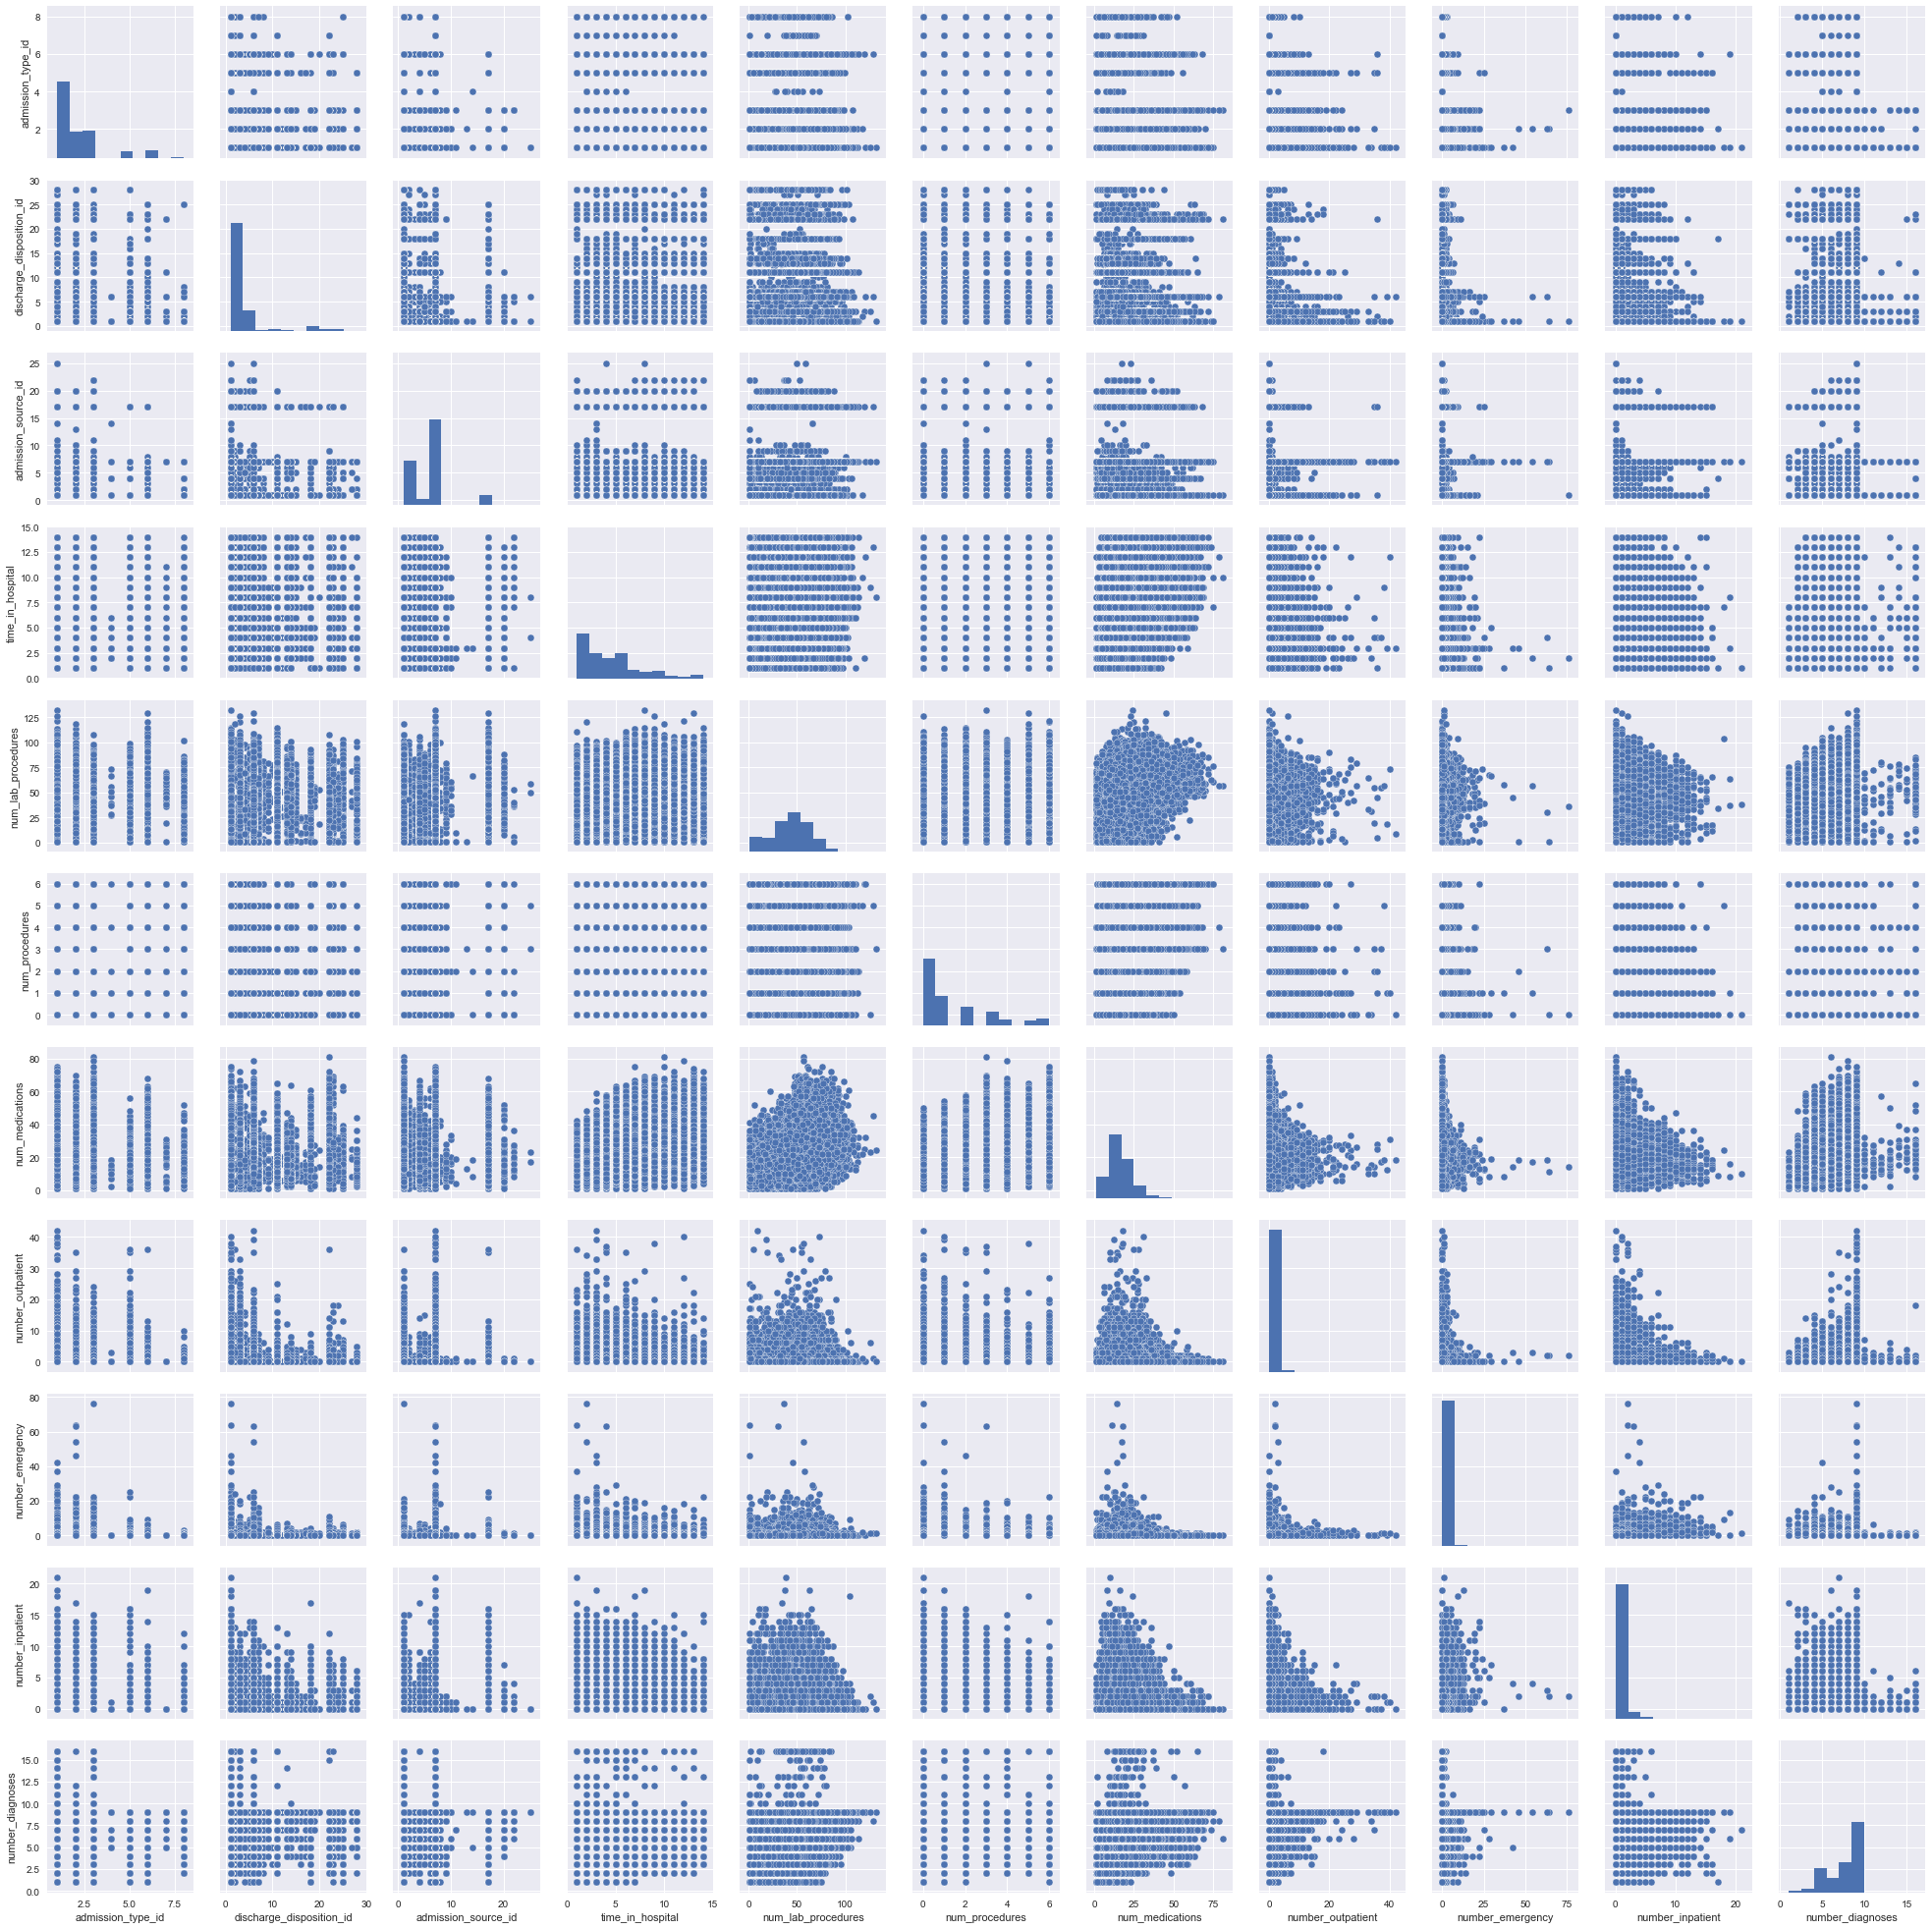

In [23]:
#plt.figure(figsize=[20,20])
##sns.pairplot(subset)
#plt.show()

In [24]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_new,diag_2_new,diag_3_new
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,NO,0,8,8
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,Ch,Yes,>30,8,0,7
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,Yes,NO,8,0,8
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,Ch,Yes,NO,7,0,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,Ch,Yes,NO,7,7,0


In [25]:
dataset['readmitted'] = dataset['readmitted'].apply(lambda x: 0 if x == '<30' else 1)

In [26]:
WithoutA1C = dataset[dataset['A1Cresult'] == 'None']
WithA1C = dataset[dataset['A1Cresult'] != 'None']

In [27]:
X = WithA1C.drop('readmitted', axis = 1)
y = WithA1C['readmitted']

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
le = LabelEncoder()

In [31]:
#A = X.types

In [32]:
for i,j in dict(X.dtypes).items():
    if str(j) == 'object':
        X[i] = le.fit_transform(X[i])
        print ('Encoded values for %s' %i)

Encoded values for diabetesMed
Encoded values for chlorpropamide
Encoded values for repaglinide
Encoded values for rosiglitazone
Encoded values for miglitol
Encoded values for glipizide
Encoded values for citoglipton
Encoded values for glipizide-metformin
Encoded values for glyburide
Encoded values for metformin
Encoded values for tolbutamide
Encoded values for pioglitazone
Encoded values for glimepiride-pioglitazone
Encoded values for glimepiride
Encoded values for glyburide-metformin
Encoded values for A1Cresult
Encoded values for troglitazone
Encoded values for metformin-rosiglitazone
Encoded values for max_glu_serum
Encoded values for acarbose
Encoded values for metformin-pioglitazone
Encoded values for acetohexamide
Encoded values for change
Encoded values for gender
Encoded values for age
Encoded values for examide
Encoded values for nateglinide
Encoded values for tolazamide
Encoded values for race
Encoded values for insulin


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [34]:
clf = DecisionTreeClassifier()

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
ypred = clf.predict(X_test)

In [38]:
print accuracy_score(y_test, ypred)

0.817077947513


In [39]:
print classification_report(y_test, ypred)

             precision    recall  f1-score   support

          0       0.14      0.17      0.15       491
          1       0.91      0.89      0.90      4615

avg / total       0.84      0.82      0.83      5106



In [40]:
for i, j in zip(clf.feature_importances_, X.columns):
    print str(j) + ' : ' + str(i)

race : 0.0211712310509
gender : 0.0207013641152
age : 0.0581257468788
admission_type_id : 0.0246909606996
discharge_disposition_id : 0.0310790377004
admission_source_id : 0.0188633129012
time_in_hospital : 0.0727341326111
num_lab_procedures : 0.135310210704
num_procedures : 0.0441682773314
num_medications : 0.105939107166
number_outpatient : 0.0193419962459
number_emergency : 0.0198266312418
number_inpatient : 0.0291475338677
number_diagnoses : 0.0371955826879
max_glu_serum : 0.00365300557348
A1Cresult : 0.0309471753702
metformin : 0.0127077292931
repaglinide : 0.00401634994087
nateglinide : 0.00253181910297
chlorpropamide : 0.0
glimepiride : 0.0112976871101
acetohexamide : 0.0
glipizide : 0.0124535527539
glyburide : 0.0123623966449
tolbutamide : 0.0
pioglitazone : 0.0119839756608
rosiglitazone : 0.0146315351023
acarbose : 0.00106510218835
miglitol : 0.0
troglitazone : 0.0
tolazamide : 0.0
examide : 0.0
citoglipton : 0.0
insulin : 0.0443313618327
glyburide-metformin : 0.00445542340512


In [41]:
sorted(zip(clf.feature_importances_, X.columns), key = lambda x: x[0], reverse = True)

[(0.13531021070405824, 'num_lab_procedures'),
 (0.1059391071656475, 'num_medications'),
 (0.072734132611095306, 'time_in_hospital'),
 (0.061336041820840757, 'diag_3_new'),
 (0.05812574687878639, 'age'),
 (0.055283162476013746, 'diag_2_new'),
 (0.054805737865395283, 'diag_1_new'),
 (0.04433136183266894, 'insulin'),
 (0.044168277331356358, 'num_procedures'),
 (0.037195582687917964, 'number_diagnoses'),
 (0.031079037700391318, 'discharge_disposition_id'),
 (0.03094717537015608, 'A1Cresult'),
 (0.029147533867735879, 'number_inpatient'),
 (0.024690960699619811, 'admission_type_id'),
 (0.021171231050925353, 'race'),
 (0.020701364115152637, 'gender'),
 (0.019826631241768592, 'number_emergency'),
 (0.01934199624588262, 'number_outpatient'),
 (0.018863312901158169, 'admission_source_id'),
 (0.014631535102313492, 'rosiglitazone'),
 (0.013660495557308194, 'change'),
 (0.012707729293128722, 'metformin'),
 (0.012453552753894899, 'glipizide'),
 (0.012362396644945123, 'glyburide'),
 (0.01198397566083

In [42]:
zip(clf.feature_importances_, X.columns)

[(0.021171231050925353, 'race'),
 (0.020701364115152637, 'gender'),
 (0.05812574687878639, 'age'),
 (0.024690960699619811, 'admission_type_id'),
 (0.031079037700391318, 'discharge_disposition_id'),
 (0.018863312901158169, 'admission_source_id'),
 (0.072734132611095306, 'time_in_hospital'),
 (0.13531021070405824, 'num_lab_procedures'),
 (0.044168277331356358, 'num_procedures'),
 (0.1059391071656475, 'num_medications'),
 (0.01934199624588262, 'number_outpatient'),
 (0.019826631241768592, 'number_emergency'),
 (0.029147533867735879, 'number_inpatient'),
 (0.037195582687917964, 'number_diagnoses'),
 (0.0036530055734756268, 'max_glu_serum'),
 (0.03094717537015608, 'A1Cresult'),
 (0.012707729293128722, 'metformin'),
 (0.0040163499408713407, 'repaglinide'),
 (0.0025318191029722438, 'nateglinide'),
 (0.0, 'chlorpropamide'),
 (0.011297687110065187, 'glimepiride'),
 (0.0, 'acetohexamide'),
 (0.012453552753894899, 'glipizide'),
 (0.012362396644945123, 'glyburide'),
 (0.0, 'tolbutamide'),
 (0.0119

In [43]:
X1 = WithoutA1C.drop('readmitted', axis = 1)
y1 = WithoutA1C['readmitted']

In [44]:
X1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_new,diag_2_new,diag_3_new
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,0,8,8
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,Ch,Yes,8,0,7
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,Yes,8,0,8
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,Ch,Yes,7,0,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,No,Ch,Yes,7,7,0


In [45]:
#X1.drop('A1Cresult', axis = 1, inplace = True)
for i,j in dict(X1.dtypes).items():
    if str(j) == 'object':
        X1[i] = le.fit_transform(X1[i])
        print ('Encoded values for %s' %i)

Encoded values for diabetesMed
Encoded values for chlorpropamide
Encoded values for repaglinide
Encoded values for rosiglitazone
Encoded values for miglitol
Encoded values for glipizide
Encoded values for citoglipton
Encoded values for glipizide-metformin
Encoded values for glyburide
Encoded values for metformin
Encoded values for tolbutamide
Encoded values for pioglitazone
Encoded values for glimepiride-pioglitazone
Encoded values for glimepiride
Encoded values for glyburide-metformin
Encoded values for A1Cresult
Encoded values for troglitazone
Encoded values for metformin-rosiglitazone
Encoded values for max_glu_serum
Encoded values for acarbose
Encoded values for metformin-pioglitazone
Encoded values for acetohexamide
Encoded values for change
Encoded values for gender
Encoded values for age
Encoded values for examide
Encoded values for nateglinide
Encoded values for tolazamide
Encoded values for race
Encoded values for insulin


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3)

In [47]:
clf1 = DecisionTreeClassifier()

In [48]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
ypred1 = clf1.predict(X_test)

In [50]:
print classification_report(y_test, ypred1)

             precision    recall  f1-score   support

          0       0.16      0.20      0.18      2831
          1       0.90      0.87      0.88     22594

avg / total       0.81      0.79      0.80     25425



In [51]:
print accuracy_score(y_test, ypred1)

0.794572271386


In [52]:
X_train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_new,diag_2_new,diag_3_new
7965,0,0,6,5,1,17,2,20,0,7,...,1,0,0,0,0,1,1,8,8,0
91041,2,1,5,3,1,1,4,19,3,19,...,1,0,0,0,0,0,1,1,0,8
54509,2,0,7,3,22,1,7,69,6,55,...,1,0,0,0,0,0,1,1,1,0
93323,2,0,6,6,1,7,2,57,1,3,...,1,0,0,0,0,1,1,3,3,3
72020,2,0,6,1,1,7,5,62,0,23,...,1,0,0,0,0,0,1,1,6,2


In [53]:
sorted(zip(clf1.feature_importances_, X_train.columns), key = lambda x: x[0], reverse = True)

[(0.13070306257424824, 'num_lab_procedures'),
 (0.11435853612968098, 'num_medications'),
 (0.07347200402412081, 'time_in_hospital'),
 (0.061077439067555583, 'diag_3_new'),
 (0.060038655942255929, 'age'),
 (0.060029559491748624, 'diag_1_new'),
 (0.053528266242667565, 'diag_2_new'),
 (0.04749179885948801, 'num_procedures'),
 (0.040275504687986519, 'number_diagnoses'),
 (0.033076960145534663, 'insulin'),
 (0.031356234021223395, 'number_inpatient'),
 (0.030188061558680646, 'discharge_disposition_id'),
 (0.027464323732490425, 'number_outpatient'),
 (0.026265168267609697, 'race'),
 (0.02602368339988324, 'admission_source_id'),
 (0.024595152504027464, 'admission_type_id'),
 (0.01979448932484254, 'number_emergency'),
 (0.018438688128756615, 'gender'),
 (0.017040452685088074, 'glipizide'),
 (0.015231448600315001, 'metformin'),
 (0.01454082356738897, 'glyburide'),
 (0.014188040439085505, 'change'),
 (0.013886978718675072, 'diabetesMed'),
 (0.010704468477379762, 'pioglitazone'),
 (0.0090626341801

In [54]:
dataset.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_new,diag_2_new,diag_3_new
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,1,0,8,8
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,Ch,Yes,1,8,0,7
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,Yes,1,8,0,8
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,Ch,Yes,1,7,0,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,Ch,Yes,1,7,7,0


In [55]:
X = dataset.drop('readmitted', axis = 1)

In [56]:
X['A1Cresult'] = X['A1Cresult'].apply(lambda x: 0 if x == 'None' else 1)

In [57]:
y = dataset['readmitted']

In [58]:
#X1.drop('A1Cresult', axis = 1, inplace = True)
for i,j in dict(X.dtypes).items():
    if str(j) == 'object':
        X[i] = le.fit_transform(X[i])
        print ('Encoded values for %s' %i)

Encoded values for diabetesMed
Encoded values for chlorpropamide
Encoded values for repaglinide
Encoded values for rosiglitazone
Encoded values for miglitol
Encoded values for glipizide
Encoded values for citoglipton
Encoded values for glipizide-metformin
Encoded values for glyburide
Encoded values for metformin
Encoded values for tolbutamide
Encoded values for pioglitazone
Encoded values for glimepiride-pioglitazone
Encoded values for glimepiride
Encoded values for glyburide-metformin
Encoded values for troglitazone
Encoded values for metformin-rosiglitazone
Encoded values for max_glu_serum
Encoded values for acarbose
Encoded values for metformin-pioglitazone
Encoded values for acetohexamide
Encoded values for change
Encoded values for gender
Encoded values for age
Encoded values for examide
Encoded values for nateglinide
Encoded values for tolazamide
Encoded values for race
Encoded values for insulin


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [60]:
clf = DecisionTreeClassifier()

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [62]:
ypred =clf.predict(X_test)

In [63]:
print accuracy_score(y_test, ypred) * 100

79.6331477236


In [64]:
X1 = X.drop('A1Cresult', axis = 1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)

In [66]:
clf2 = DecisionTreeClassifier()

In [67]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [68]:
y2pred = clf2.predict(X_test)

In [69]:
print accuracy_score(y_test, y2pred) * 100

79.7215853259


In [70]:
y2pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [71]:
y.value_counts()

1    90409
0    11357
Name: readmitted, dtype: int64